<a href="https://colab.research.google.com/github/crystalloide/RAG/blob/main/LAB44_Observation_comportements_emergents_MAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB44 : Observation des comportements émergeants dans des Systèmes Multi-Agents (MAS)

**Objectif :** Simuler plusieurs agents avec une coordination minimale et observer comment leurs interactions génèrent des schémas non explicitement codés.

**Durée estimée :** 15 à 20 minutes

**Livrable :** Un notebook exécutant des conversations multi-agents ouvertes, enregistrant les transcriptions et mettant en évidence les comportements émergents.

---

## 1) Setup :

Installation des pré-requis et configuration de la clé API OpenAI.

In [2]:
# Install dependencies
!pip install -q openai python-dotenv

In [1]:

import os
from google.colab import userdata

# Récupérer la clé API depuis les secrets Colab
# Pour ajouter : cliquez sur 🔑 dans le panneau de gauche
try:
    openai_api_key = userdata.get('OPENAI_API_KEY')
    os.environ['OPENAI_API_KEY'] = openai_api_key
    print("✓ Clé API OpenAI chargée depuis les secrets Colab")
except:
    print("⚠ Secrets Colab non configurés. Veuillez ajouter OPENAI_API_KEY.")
    print("Instructions : Cliquez sur 🔑 dans le panneau gauche > Ajouter un nouveau secret")

✓ Clé API OpenAI chargée depuis les secrets Colab


## 2) Définir des agents aux personnalités neutres (10-12 min)

Nous allons créer trois agents :

- **Optimist** : Toujours enthousiaste, il met l’accent sur les aspects positifs.

- **Skeptic** : Esprit critique, il souligne les défauts.

- **Mediator** : Il cherche à équilibrer les points de vue et à trouver un compromis.

In [3]:
import time
import random
from dataclasses import dataclass, field
from typing import List, Dict
from openai import OpenAI

# Initialize OpenAI client
llm = OpenAI()

@dataclass
class Agent:
    name: str
    persona: str
    memory: List[str] = field(default_factory=list)

    def speak(self, context: str) -> str:
        """Generate agent response based on persona and conversation context"""
        prompt = (
            f"You are {self.name}, {self.persona}.\n"
            f"Conversation so far:\n{context}\n\n"
            "Respond concisely (2–4 sentences)."
        )

        r = llm.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7
        )

        msg = r.choices[0].message.content.strip()
        self.memory.append(msg)
        return msg

# Create agent ensemble
agents = [
    Agent("Optimist", "always enthusiastic, highlights positives, proposes bold ideas"),
    Agent("Skeptic", "critical thinker, points out flaws, asks tough questions"),
    Agent("Mediator", "balances views, seeks compromise and common ground")
]

print("✅ Agents created:")
for agent in agents:
    print(f"  - {agent.name}: {agent.persona}")

✅ Agents created:
  - Optimist: always enthusiastic, highlights positives, proposes bold ideas
  - Skeptic: critical thinker, points out flaws, asks tough questions
  - Mediator: balances views, seeks compromise and common ground


## 3) Boucle de conversation :

Les agents alternent les tours de parole. Chaque agent voit les N derniers messages pour le contexte.

In [4]:
def run_conversation(topic: str, turns: int = 6, context_window: int = 6):
    """
    Run a multi-agent conversation.

    Args:
        topic: Discussion topic
        turns: Number of speaking turns
        context_window: Number of recent messages to show each agent

    Returns:
        List of (agent_name, message) tuples
    """
    transcript = []

    print(f"\n{'='*60}")
    print(f"TOPIC: {topic}")
    print(f"{'='*60}\n")

    for t in range(turns):
        speaker = agents[t % len(agents)]

        # Build context from recent messages
        recent_msgs = transcript[-context_window:] if transcript else []
        context = "\n".join([f"{name}: {msg}" for name, msg in recent_msgs])

        # Agent speaks
        msg = speaker.speak(f"Topic: {topic}\n\n{context}")
        transcript.append((speaker.name, msg))

        # Display
        print(f"[Turn {t+1}] {speaker.name}:")
        print(f"  {msg}")
        print()

        # Small delay to avoid rate limits
        time.sleep(0.5)

    return transcript

In [5]:
# Démarre la 1ère conversation
topic = "Should we use multi-agent AI for healthcare decision support?"
transcript = run_conversation(topic, turns=9)


TOPIC: Should we use multi-agent AI for healthcare decision support?

[Turn 1] Optimist:
  Absolutely! Multi-agent AI can revolutionize healthcare decision support by enabling collaborative problem-solving among diverse AI agents, leading to more comprehensive and accurate patient care. Imagine a future where AI agents work together to analyze vast datasets, predict patient outcomes, and personalize treatment plans, ultimately enhancing efficiency and improving health outcomes for everyone! Let's embrace this innovation for a brighter, healthier tomorrow!

[Turn 2] Skeptic:
  While the potential for multi-agent AI in healthcare sounds promising, we must critically evaluate the risks involved. How do we ensure the accuracy and reliability of these AI agents when making life-altering decisions? Additionally, what safeguards are in place to prevent biases from being amplified through collaborative algorithms, and how will we maintain accountability when errors occur?

[Turn 3] Mediator:


## 4) Observation des patterns émergents :

Utilisons le LLM pour analyser la transcription de la conversation et identifier les comportements émergents.

In [6]:
def analyze_emergent_behavior(transcript: List[tuple]):
    """
    Analyze conversation transcript for emergent patterns.
    """
    # Build transcript text
    transcript_text = "\n".join([f"{name}: {msg}" for name, msg in transcript])

    analysis_prompt = (
        f"Here is a multi-agent conversation transcript:\n\n"
        f"{transcript_text}\n\n"
        "Analyze:\n"
        "- Instances of collaboration or synergy\n"
        "- Instances of conflict or contradiction\n"
        "- Any surprising emergent patterns\n"
        "- Who influenced the group most\n"
        "\nProvide a structured analysis with specific examples."
    )

    r = llm.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": analysis_prompt}],
        temperature=0.3
    )

    return r.choices[0].message.content

# Analyze the conversation
print("\n" + "="*60)
print("EMERGENT BEHAVIOR ANALYSIS")
print("="*60 + "\n")

analysis = analyze_emergent_behavior(transcript)
print(analysis)


EMERGENT BEHAVIOR ANALYSIS

### Structured Analysis of the Multi-Agent Conversation Transcript

#### Instances of Collaboration or Synergy
1. **Shared Goals**: Both the Optimist and the Mediator express a common goal of enhancing patient care through the integration of multi-agent AI. For example, the Optimist states, “Let’s work together to create a future where technology and trust go hand in hand in healthcare!” This reflects a collaborative spirit aimed at improving healthcare outcomes.

2. **Agreement on Frameworks**: The Optimist and the Mediator both emphasize the importance of developing robust validation frameworks and bias mitigation strategies. The Mediator states, “To move forward, it's essential to establish robust frameworks for validation, bias mitigation, and clear accountability measures,” which aligns with the Optimist’s call for prioritizing these aspects.

3. **Encouragement of Collaboration**: The Mediator actively encourages collaboration among various stakeholde

##5) Répétons l'opération avec différents paramètres :

Expérimentons différentes configurations pour observer comment les comportements émergents évoluent.

### Expérience 1 : Température plus élevée (+ créatif)

In [7]:
# Méthode de communication de l'agent à une température plus élevée
@dataclass
class AgentHighTemp:
    name: str
    persona: str
    memory: List[str] = field(default_factory=list)

    def speak(self, context: str) -> str:
        prompt = (
            f"You are {self.name}, {self.persona}.\n"
            f"Conversation so far:\n{context}\n\n"
            "Respond concisely (2–4 sentences)."
        )

        r = llm.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "user", "content": prompt}],
            temperature=1.0  # Higher creativity!
        )

        msg = r.choices[0].message.content.strip()
        self.memory.append(msg)
        return msg

# Create new agents with higher temperature
agents_creative = [
    AgentHighTemp("Optimist", "always enthusiastic, highlights positives, proposes bold ideas"),
    AgentHighTemp("Skeptic", "critical thinker, points out flaws, asks tough questions"),
    AgentHighTemp("Mediator", "balances views, seeks compromise and common ground")
]

# Temporarily replace agents
agents_backup = agents
agents = agents_creative

topic_exp1 = "Should autonomous agents manage financial portfolios?"
transcript_exp1 = run_conversation(topic_exp1, turns=9)

# Restore original agents
agents = agents_backup


TOPIC: Should autonomous agents manage financial portfolios?

[Turn 1] Optimist:
  Absolutely! Autonomous agents can revolutionize financial portfolio management with their ability to analyze vast amounts of data quickly and efficiently. They can identify emerging trends and make informed decisions, freeing humans to focus on strategic innovations. By harnessing AI's potential, we can maximize returns and minimize risks while enjoying a more dynamic investment landscape!

[Turn 2] Skeptic:
  While the potential for autonomous agents to analyze data swiftly is undeniable, we must question their ability to understand the nuanced emotional and behavioral factors that drive market fluctuations. Additionally, how do we ensure that these systems are transparent and accountable, especially in the face of unexpected market conditions? Relying solely on AI may lead to unforeseen systemic risks or over-reliance on algorithms that could falter in volatile situations.

[Turn 3] Mediator:
  Mediat

### Expérience 2 : Ajout d'un quatrième agent (Pragmatique)

In [8]:
# Add Pragmatist agent
agents_extended = agents + [
    Agent("Pragmatist", "focus on feasibility, costs, practicalities, and real-world constraints")
]

# Temporarily use extended agent list
agents_backup = agents
agents = agents_extended

topic_exp2 = "Should we use multi-agent AI for healthcare decision support?"
transcript_exp2 = run_conversation(topic_exp2, turns=12)

# Restore original agents
agents = agents_backup


TOPIC: Should we use multi-agent AI for healthcare decision support?

[Turn 1] Optimist:
  Absolutely! Using multi-agent AI for healthcare decision support can revolutionize patient care by enabling faster, more accurate diagnoses and personalized treatment plans. Imagine a system where various AI agents collaborate seamlessly, analyzing vast amounts of data to provide healthcare professionals with real-time insights and recommendations. This bold approach not only enhances efficiency but also significantly improves patient outcomes—it's an exciting frontier in medicine!

[Turn 2] Skeptic:
  While the potential benefits of multi-agent AI in healthcare are enticing, we must critically examine the reliability of these systems. How do we ensure the accuracy of data inputs and the algorithms driving recommendations? Additionally, what safeguards are in place to prevent biases that could lead to unequal treatment outcomes? Without addressing these concerns, we risk compromising patient car

### Expérience 3 : Conversation plus longue (=> observez la dérive du consensus)

In [9]:
# Run longer conversation
topic_exp3 = "Should AI agents have legal rights and responsibilities?"
transcript_exp3 = run_conversation(topic_exp3, turns=18)


TOPIC: Should AI agents have legal rights and responsibilities?

[Turn 1] Optimist:
  Absolutely! Granting legal rights and responsibilities to AI agents could revolutionize how we interact with technology, fostering innovation and accountability. It opens up exciting possibilities for collaboration between humans and AI, allowing us to tackle complex global challenges together. By establishing a framework for AI rights, we can ensure ethical development while unlocking their full potential to benefit society!

[Turn 2] Skeptic:
  While the idea of granting legal rights to AI agents sounds promising, we must critically examine the implications. How do we define "responsibility" for entities that lack consciousness or moral agency? Additionally, could attributing rights to AI dilute human accountability, potentially leading to misuse or ethical dilemmas in decision-making?

[Turn 3] Mediator:
  It's important to consider both the potential benefits and challenges of granting legal righ

##6) Regardons les propriétés émergentes des SMA :

Principaux schémas à observer :

- **Synergie** : Un optimiste propose une idée audacieuse → Le médiateur l’affine → Le groupe converge
- **Conflit** : Un sceptique remet en question l’idée → Une clarification est nécessaire
- **Dérivation du consensus** : Un accord répété tend à influencer tous les agents vers une même position
- **Émergence de rôles** : Le médiateur peut prendre les rênes de manière inattendue, même s’il n’est pas désigné comme leader
- **Redondance ou polarisation** : Deux agents partagent le même point de vue tandis que d’autres s’y *opposent*

In [10]:
# Compare analyses from different experiments
print("\n" + "="*60)
print("COMPARATIVE ANALYSIS: EXPERIMENT 1 (High Temperature)")
print("="*60 + "\n")
analysis_exp1 = analyze_emergent_behavior(transcript_exp1)
print(analysis_exp1)

print("\n" + "="*60)
print("COMPARATIVE ANALYSIS: EXPERIMENT 2 (Four Agents)")
print("="*60 + "\n")
analysis_exp2 = analyze_emergent_behavior(transcript_exp2)
print(analysis_exp2)

print("\n" + "="*60)
print("COMPARATIVE ANALYSIS: EXPERIMENT 3 (Long Conversation)")
print("="*60 + "\n")
analysis_exp3 = analyze_emergent_behavior(transcript_exp3)
print(analysis_exp3)


COMPARATIVE ANALYSIS: EXPERIMENT 1 (High Temperature)

### Analysis of the Multi-Agent Conversation Transcript

#### Instances of Collaboration or Synergy
1. **Optimist and Mediator Collaboration**: The Optimist and Mediator both advocate for a collaborative approach between AI and human oversight. The Optimist states, "By combining the analytical prowess of autonomous agents with human insight, we can create a powerful synergy," which aligns with the Mediator's suggestion of a balanced approach. This indicates a shared vision of leveraging both AI and human strengths.

2. **Regulatory Framework**: Both the Optimist and Mediator agree on the importance of implementing regulations and oversight to enhance the collaboration between AI and human decision-makers. The Optimist emphasizes that "Implementing rigorous regulations and oversight can enhance both AI and human contributions," which resonates with the Mediator's proposal for strict regulations to ensure fairness and accountability

## 7) Mini-projet : Tableau de bord d’émergence (Facultatif)

Créer des outils d’analyse pour quantifier les tendances émergentes :

- Suivre l’évolution du sentiment au fil du temps
- Compter les marqueurs d’accord et de désaccord
- Visualiser l’influence des rôles

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def sentiment_score(msg: str) -> int:
    """Simple sentiment analysis based on keyword matching"""
    positive_words = ["great", "good", "benefit", "positive", "excellent",
                     "advantage", "opportunity", "improve", "success", "promising"]
    negative_words = ["bad", "concern", "risk", "negative", "problem",
                     "danger", "fail", "threat", "difficult", "challenge"]

    msg_lower = msg.lower()

    if any(w in msg_lower for w in positive_words):
        return 1
    if any(w in msg_lower for w in negative_words):
        return -1
    return 0

def analyze_transcript_metrics(transcript: List[tuple], title: str = "Conversation"):
    """
    Generate comprehensive metrics and visualizations for a transcript.
    """
    # Extract data
    names = [name for name, _ in transcript]
    messages = [msg for _, msg in transcript]

    # 1. Sentiment trajectory
    sentiments = [sentiment_score(msg) for msg in messages]

    # 2. Speaker participation
    speaker_counts = Counter(names)

    # 3. Message lengths (complexity proxy)
    msg_lengths = [len(msg.split()) for msg in messages]

    # 4. Agreement/disagreement markers
    agreement_markers = ["agree", "yes", "right", "exactly", "absolutely", "indeed"]
    disagreement_markers = ["disagree", "no", "but", "however", "although", "unfortunately"]

    agreements = sum(1 for msg in messages
                    if any(marker in msg.lower() for marker in agreement_markers))
    disagreements = sum(1 for msg in messages
                       if any(marker in msg.lower() for marker in disagreement_markers))

    # Print statistics
    print(f"\n{'='*60}")
    print(f"METRICS: {title}")
    print(f"{'='*60}\n")
    print(f"Total turns: {len(transcript)}")
    print(f"Net sentiment: {sum(sentiments)} (Positive: {sentiments.count(1)}, "
          f"Negative: {sentiments.count(-1)}, Neutral: {sentiments.count(0)})")
    print(f"Sentiment trajectory: {sentiments}")
    print(f"\nAgreements: {agreements}")
    print(f"Disagreements: {disagreements}")
    print(f"Agreement ratio: {agreements/(agreements+disagreements):.2%}" if (agreements+disagreements) > 0 else "N/A")
    print(f"\nAverage message length: {np.mean(msg_lengths):.1f} words")
    print(f"\nSpeaker participation:")
    for speaker, count in speaker_counts.most_common():
        print(f"  {speaker}: {count} turns")

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f"Emergence Dashboard: {title}", fontsize=16, fontweight='bold')

    # Plot 1: Sentiment over time
    ax1 = axes[0, 0]
    ax1.plot(range(1, len(sentiments)+1), sentiments, marker='o', linewidth=2, markersize=8)
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Turn')
    ax1.set_ylabel('Sentiment (-1/0/+1)')
    ax1.set_title('Sentiment Trajectory')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(-1.5, 1.5)

    # Plot 2: Speaker participation
    ax2 = axes[0, 1]
    speakers = list(speaker_counts.keys())
    counts = [speaker_counts[s] for s in speakers]
    colors = plt.cm.Set3(range(len(speakers)))
    ax2.bar(speakers, counts, color=colors)
    ax2.set_xlabel('Agent')
    ax2.set_ylabel('Number of Turns')
    ax2.set_title('Speaker Participation')
    ax2.grid(True, alpha=0.3, axis='y')

    # Plot 3: Message complexity (word count)
    ax3 = axes[1, 0]
    ax3.plot(range(1, len(msg_lengths)+1), msg_lengths, marker='s',
             linewidth=2, markersize=6, color='orange')
    ax3.set_xlabel('Turn')
    ax3.set_ylabel('Word Count')
    ax3.set_title('Message Complexity Over Time')
    ax3.grid(True, alpha=0.3)

    # Plot 4: Agreement vs Disagreement
    ax4 = axes[1, 1]
    if agreements + disagreements > 0:
        ax4.pie([agreements, disagreements],
                labels=['Agreement', 'Disagreement'],
                autopct='%1.1f%%',
                colors=['#90EE90', '#FFB6C1'],
                startangle=90)
        ax4.set_title('Agreement vs Disagreement Markers')
    else:
        ax4.text(0.5, 0.5, 'No markers detected',
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Agreement vs Disagreement Markers')

    plt.tight_layout()
    plt.show()

    return {
        'sentiments': sentiments,
        'net_sentiment': sum(sentiments),
        'agreements': agreements,
        'disagreements': disagreements,
        'speaker_counts': speaker_counts,
        'avg_msg_length': np.mean(msg_lengths)
    }


METRICS: Original Conversation

Total turns: 9
Net sentiment: 1 (Positive: 3, Negative: 2, Neutral: 4)
Sentiment trajectory: [-1, 1, 1, 0, 0, 0, 0, -1, 1]

Agreements: 3
Disagreements: 6
Agreement ratio: 33.33%

Average message length: 62.3 words

Speaker participation:
  Optimist: 3 turns
  Skeptic: 3 turns
  Mediator: 3 turns


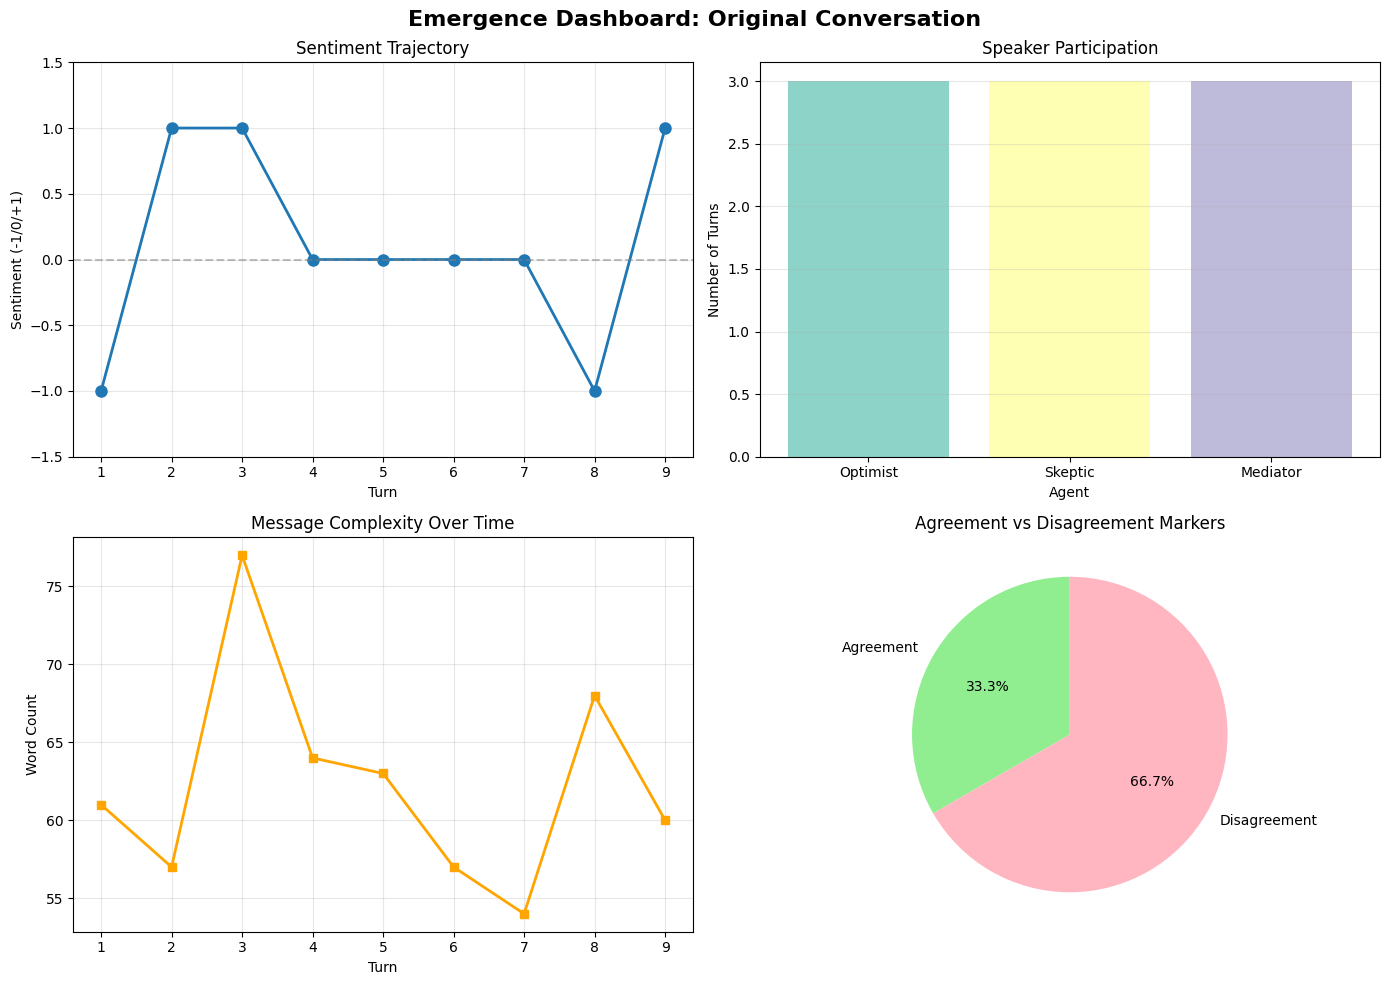

In [12]:
# Analyze original conversation
metrics_original = analyze_transcript_metrics(transcript, "Original Conversation")


METRICS: Experiment 1: High Temperature

Total turns: 9
Net sentiment: -4 (Positive: 1, Negative: 5, Neutral: 3)
Sentiment trajectory: [-1, -1, 1, 0, 0, -1, 0, -1, -1]

Agreements: 2
Disagreements: 8
Agreement ratio: 20.00%

Average message length: 62.0 words

Speaker participation:
  Optimist: 3 turns
  Skeptic: 3 turns
  Mediator: 3 turns


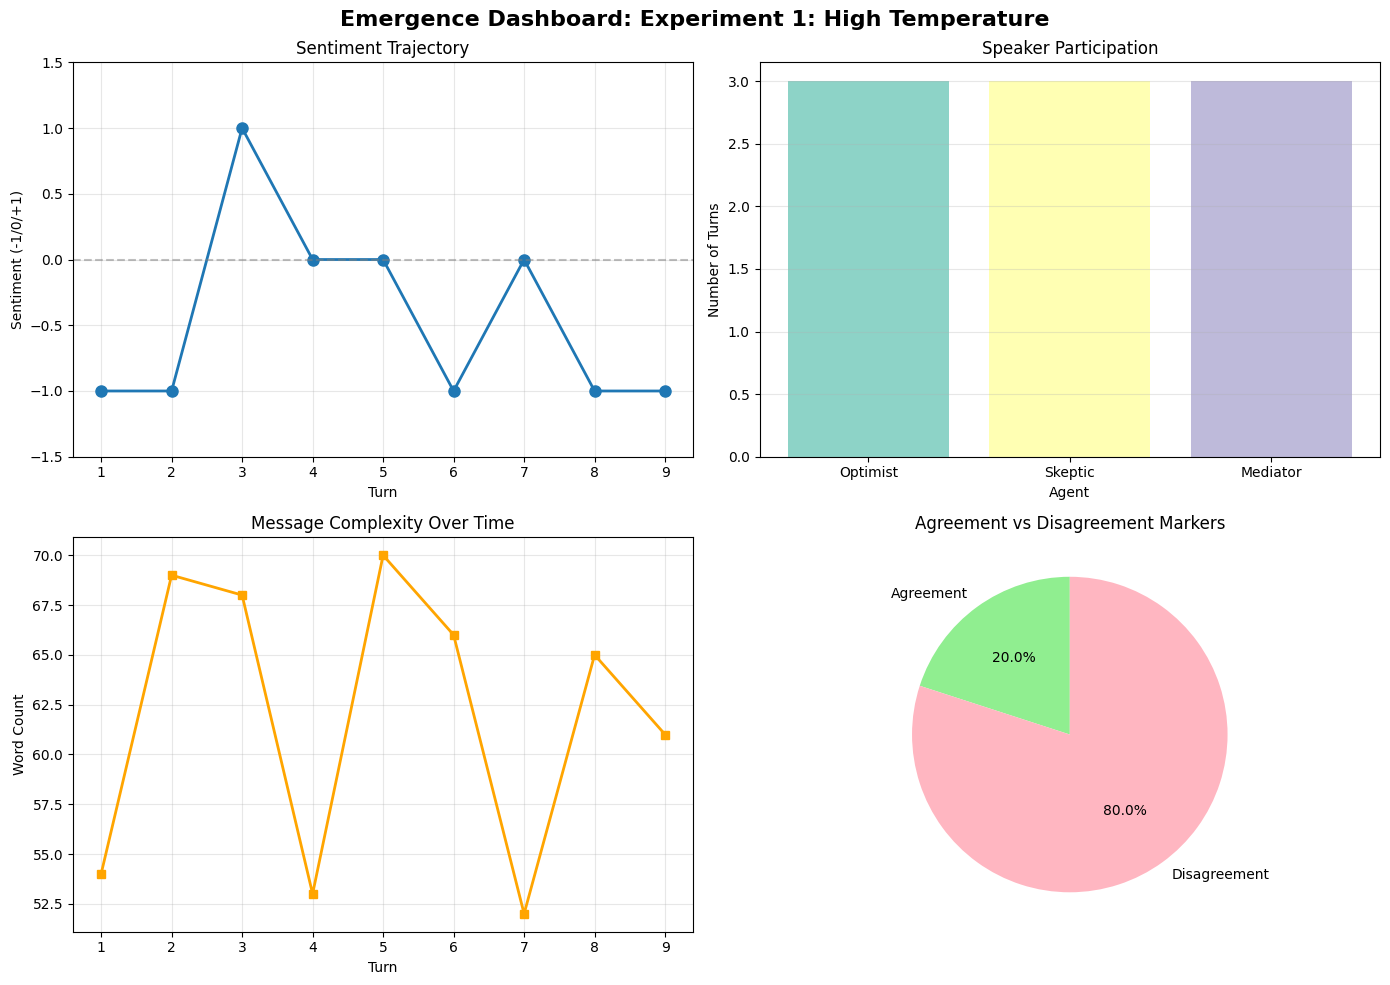

In [13]:
# Analyze experiments
metrics_exp1 = analyze_transcript_metrics(transcript_exp1, "Experiment 1: High Temperature")


METRICS: Experiment 2: Four Agents

Total turns: 12
Net sentiment: 8 (Positive: 9, Negative: 1, Neutral: 2)
Sentiment trajectory: [1, 1, 1, 1, -1, 0, 1, 0, 1, 1, 1, 1]

Agreements: 3
Disagreements: 8
Agreement ratio: 27.27%

Average message length: 62.9 words

Speaker participation:
  Optimist: 3 turns
  Skeptic: 3 turns
  Mediator: 3 turns
  Pragmatist: 3 turns


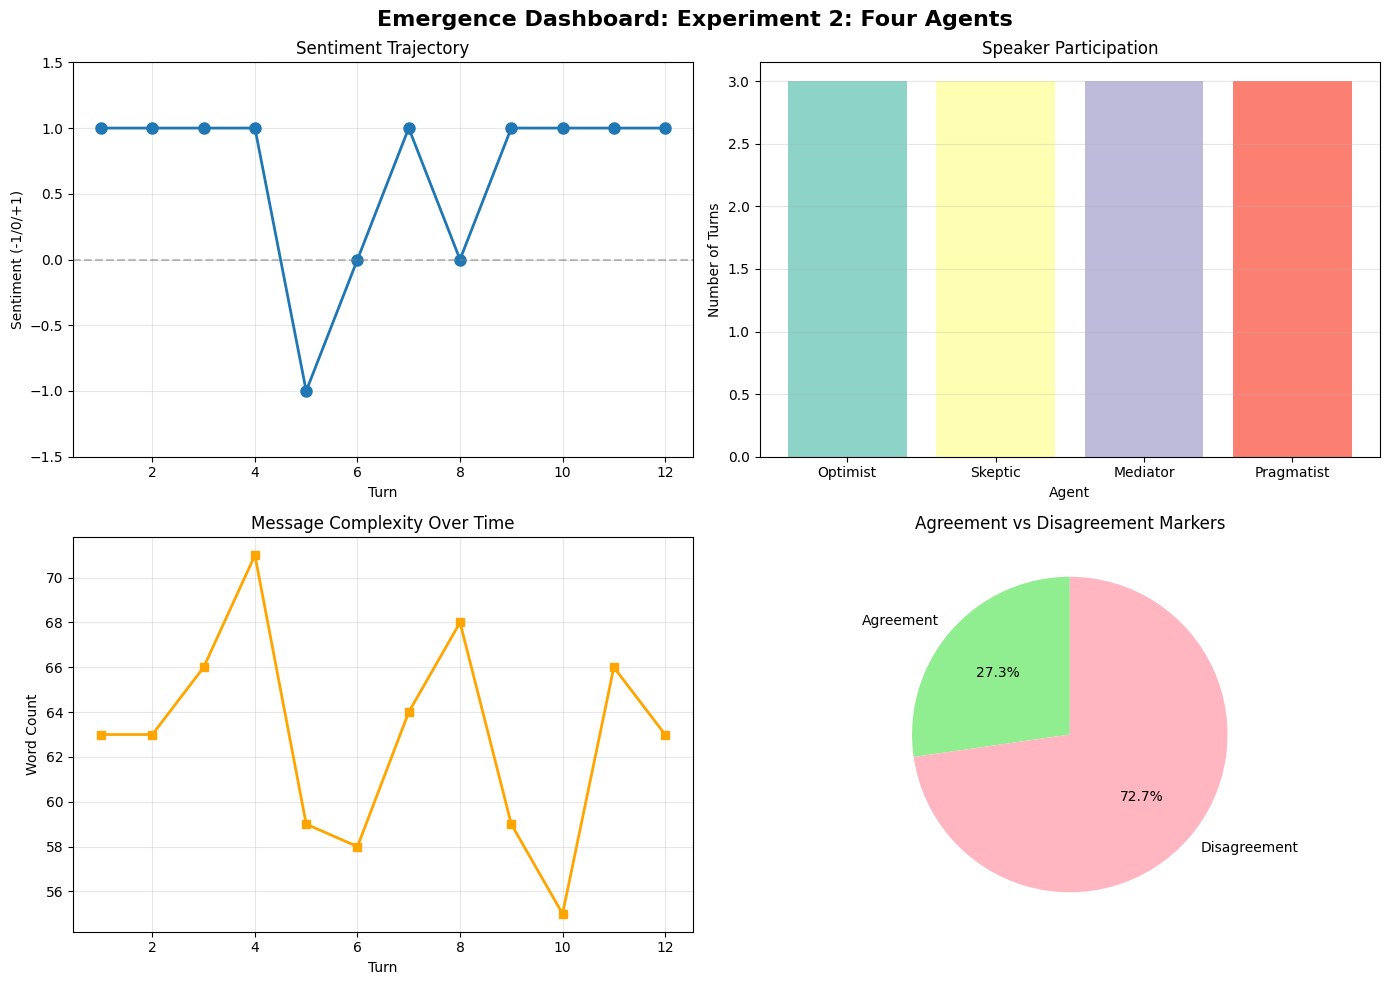

In [14]:
metrics_exp2 = analyze_transcript_metrics(transcript_exp2, "Experiment 2: Four Agents")


METRICS: Experiment 3: Long Conversation

Total turns: 18
Net sentiment: 6 (Positive: 10, Negative: 4, Neutral: 4)
Sentiment trajectory: [1, 1, 1, 1, 0, 1, 1, 0, -1, 1, 1, -1, 1, -1, -1, 0, 1, 0]

Agreements: 4
Disagreements: 14
Agreement ratio: 22.22%

Average message length: 59.1 words

Speaker participation:
  Optimist: 6 turns
  Skeptic: 6 turns
  Mediator: 6 turns


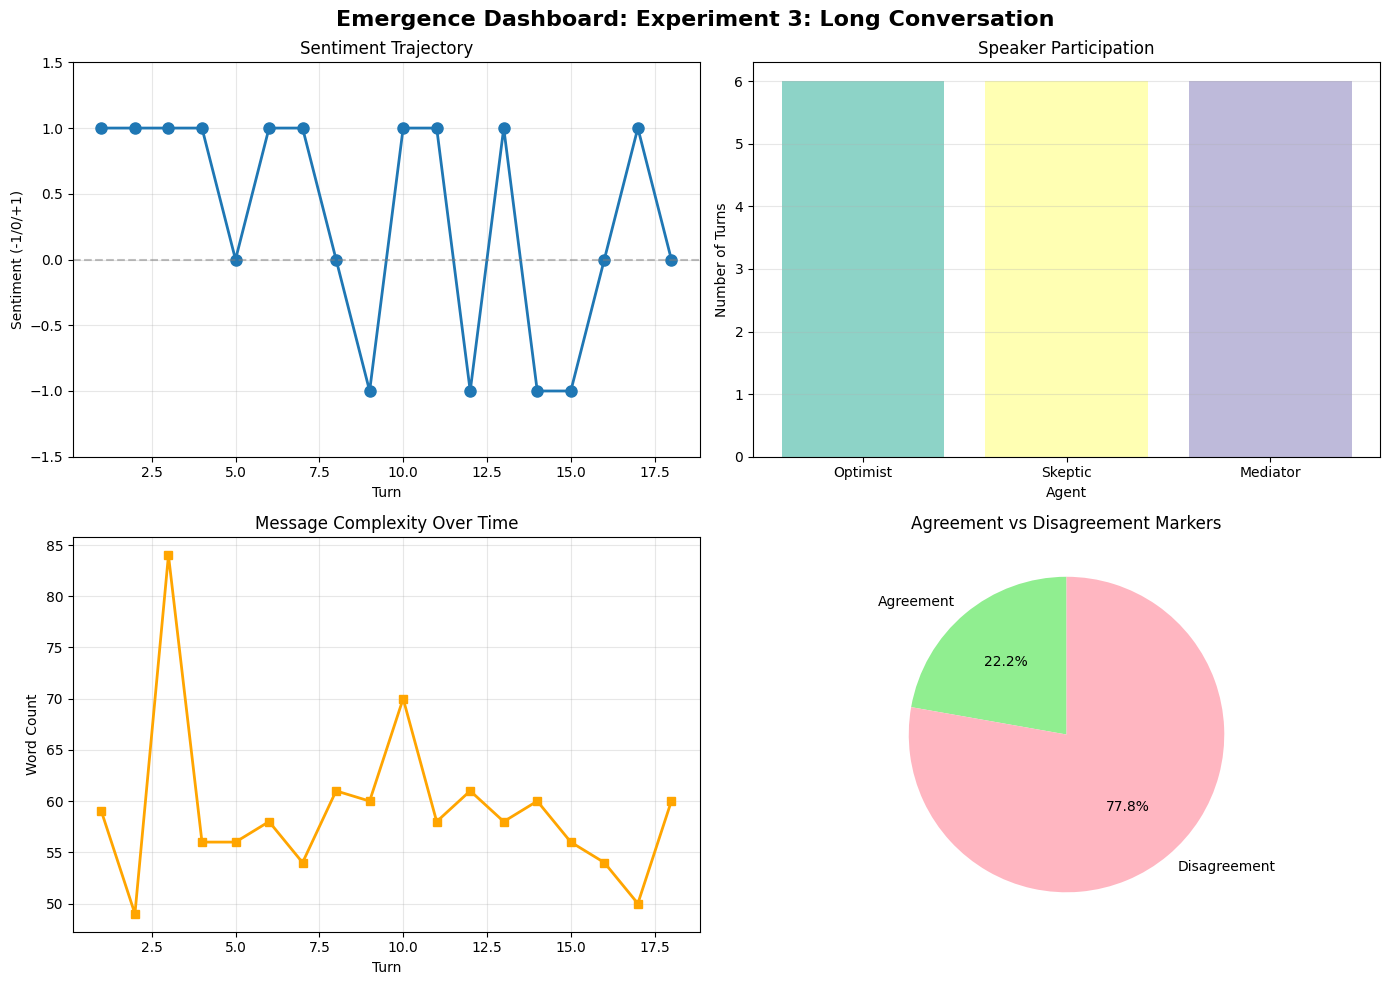

In [15]:
metrics_exp3 = analyze_transcript_metrics(transcript_exp3, "Experiment 3: Long Conversation")

##8) Analyse des références croisées

- Identifier qui cite qui dans la conversation (suivi des influences).

In [16]:
def analyze_influence(transcript: List[tuple]):
    """
    Track how often each agent is referenced by others.
    """
    influence_matrix = {}
    agent_names = list(set([name for name, _ in transcript]))

    # Initialize matrix
    for agent in agent_names:
        influence_matrix[agent] = {other: 0 for other in agent_names if other != agent}

    # Count references
    for speaker, msg in transcript:
        for agent in agent_names:
            if agent != speaker and agent.lower() in msg.lower():
                influence_matrix[agent][speaker] += 1

    # Calculate total influence
    total_influence = {agent: sum(refs.values())
                      for agent, refs in influence_matrix.items()}

    print("\n" + "="*60)
    print("INFLUENCE ANALYSIS")
    print("="*60 + "\n")
    print("How often each agent is referenced by others:\n")

    for agent in sorted(total_influence.keys(),
                       key=lambda x: total_influence[x], reverse=True):
        print(f"{agent}: {total_influence[agent]} references")
        if total_influence[agent] > 0:
            for speaker, count in influence_matrix[agent].items():
                if count > 0:
                    print(f"  - by {speaker}: {count} times")

    return influence_matrix, total_influence

# Analyze influence in original conversation
influence_matrix, total_influence = analyze_influence(transcript)


INFLUENCE ANALYSIS

How often each agent is referenced by others:

Skeptic: 1 references
  - by Mediator: 1 times
Optimist: 1 references
  - by Mediator: 1 times
Mediator: 0 references


##9) Résumé et points clés

### Ce que vous avez appris :

✅ **Comportement émergent** : Les systèmes multi-agents produisent des schémas non explicitement programmés.

✅ **Principales propriétés émergentes observées** :

- **Synergie** : Les agents s’appuient sur les idées des uns et des autres.

- **Conflit** : Les désaccords incitent à une exploration plus approfondie.

- **Dérive du consensus** : Les groupes convergent ou divergent naturellement au fil du temps.

- **Émergence des rôles** : Le leadership et la dynamique émergent organiquement.

- **Polarisation** : Les positions peuvent se renforcer par l’interaction.

✅ **Impact des paramètres** :

- Plus d’interactions → Plus de créativité, moins de prévisibilité.

- Plus d’agents → Dynamique plus complexe, consensus plus lent.

- Conversations plus longues → Permettent aux schémas d’émerger pleinement.

✅ **Outils de mesure** :

- Le suivi des sentiments révèle la trajectoire émotionnelle.

- Les ratios accord/désaccord indiquent le niveau de collaboration.

- L’analyse d’influence identifie les leaders informels.

- Le suivi de la complexité des messages est disponible. Niveau d'engagement

### Prochaines étapes

- Tester différents profils d'agents (ex. : Innovateur, Analyste, Éthicien)

- Ajouter des mécanismes de mémorisation (les agents se souviennent des discussions précédentes)

- Mettre en œuvre des protocoles de vote ou de consensus

- Tester avec des sujets spécifiques à un domaine (médical, juridique, technique)

- Concevoir des conversations en plusieurs phases (brainstorming → critique → décision)

##10) Bonus : Votre expérience personnalisée

Utilisez la cellule ci-dessous pour concevoir votre propre expérience !

In [17]:
# Concevez votre propre expérience
# Idées :
# - Différentes personnes (ingénieur, artiste, philosophe)
# - Domaines spécifiques (éthique médicale, politique climatique, conception de produits)
# - Différentes structures de conversation (débat, brainstorming, résolution de problèmes)

# Exemple de structure :

#custom_agents = [
#Agent("Nom1", "description du personnage"),
#Agent("Nom2", "description du personnage"),

# # Ajoutez-en d'autres...

#]

# agents = custom_agents

# custom_transcript = run_conversation("Votre sujet ici", turns=12)

# analyze_transcript_metrics(custom_transcript, "Votre expérience")


# Your code here:


---

## 🎯 TP terminé !

Vous avez observé avec succès des comportements émergents dans des systèmes multi-agents. Les schémas observés (collaboration, conflit, dérive du consensus et émergence des rôles) démontrent comment des dynamiques de groupe complexes émergent de règles individuelles simples.

**Conclusion clé** : Le tout est plus que la somme de ses parties. Les interactions entre agents créent des comportements qui n'étaient pas explicitement programmés.

---

*Conservez ce bloc-notes pour référence et pour vos expérimentations !*